### Imports

In [11]:
# Dependencies
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
import cv2

In [3]:
# Pre-trained model
model_handle = 'https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2'
model = hub.load(model_handle)

### Data Preprocessing

In [4]:
def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

In [5]:
content_img = load_image('content.jpg')
style_img = load_image('style.PNG')

### Data Visualization

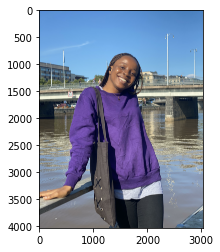

In [6]:
plt.imshow(np.squeeze(content_img))
plt.show()

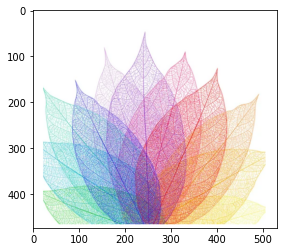

In [7]:
plt.imshow(np.squeeze(style_img))
plt.show()

### Image Stylization

In [8]:
outputs = model(tf.constant(content_img), tf.constant(style_img))
stylized_img = outputs[0]

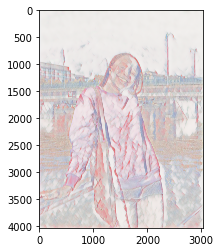

In [9]:
plt.imshow(np.squeeze(stylized_img))
plt.show()

#### Save your generated image

In [12]:
cv2.imwrite('generated_img.jpg', cv2.cvtColor(np.squeeze(stylized_img)*255, cv2.COLOR_BGR2RGB))

True